In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


# Exploratory Data Analysis (EDA)

Here I will be performing EDA on our spam/ham dataset.

In [2]:
import pandas as pd


df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df = df.rename(columns={"v1":"labels", "v2":"text"})
df.head()

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.describe()

,labels,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df.labels.value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

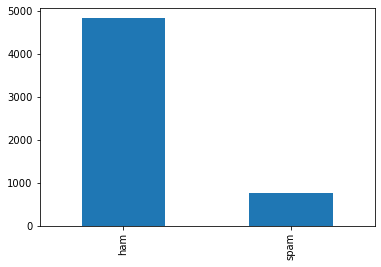

In [6]:
df.labels.value_counts().plot.bar()

In [7]:
# Replacing spam with 1 and ham with 0
df['spam']=df['labels']
for i,j in df.iterrows():
    # i is index
    # j is (labels, text)
    if j['labels']=='ham':
        j['spam'] = 0
    else:
        j['spam']=1

In [8]:
df.head()

,labels,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


# Pre-processing of SMS

This task involves :<br>
1. Tokenization
2. Vectorization
3. TF-IDF resemblency

## Removal of punctuations and stop-words

### Punctuations

In [9]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


### Stop-words

Stop words are words like “and”, “the”, “him”, which are presumed to be uninformative in representing the content of a text,
and which may be removed to avoid them being construed as signal for prediction.

In [10]:
from nltk.corpus import stopwords
print(stopwords.words('english')[10:15])

["you've", "you'll", "you'd", 'your', 'yours']


In [11]:
def punctuation_stopwords_removal(sms):
    # filters charecter-by-charecter : ['h', 'e', 'e', 'l', 'o', 'o', ' ', 'm', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'p', 'u', 'r', 'v', 'a']
    remove_punctuation = [ch for ch in sms if ch not in string.punctuation]
    # convert them back to sentences and split into words
    remove_punctuation = "".join(remove_punctuation).split()
    filtered_sms = [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words('english')]
    return filtered_sms

In [12]:
print(punctuation_stopwords_removal("Hello we need to send this report by EOD.!!! yours sincerely, Purva"))

['hello', 'need', 'send', 'report', 'eod', 'sincerely', 'purva']


In [13]:
print(df.head())

  labels                                               text spam
0    ham  Go until jurong point, crazy.. Available only ...    0
1    ham                      Ok lar... Joking wif u oni...    0
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...    1
3    ham  U dun say so early hor... U c already then say...    0
4    ham  Nah I don't think he goes to usf, he lives aro...    0


# Analysis of most common words in spam and ham SMS

Here, we will be making use of `collections.Counter`.

In [14]:
from collections import Counter

data_ham = df[df['spam']==0].copy()
data_spam = df[df['spam']==1].copy()


In [15]:
print(data_ham[:2])
print(data_spam[:2])

  labels                                               text spam
0    ham  Go until jurong point, crazy.. Available only ...    0
1    ham                      Ok lar... Joking wif u oni...    0
  labels                                               text spam
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...    1
5   spam  FreeMsg Hey there darling it's been 3 week's n...    1


In [16]:
data_ham.loc[:, 'text'] = data_ham['text'].apply(punctuation_stopwords_removal)
print(data_ham[:1])

  labels                                               text spam
0    ham  [go, jurong, point, crazy, available, bugis, n...    0


In [17]:
words_data_ham = data_ham['text'].tolist()

In [18]:
words_data_ham[:3]

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']]

In [19]:
data_spam.loc[:, 'text']=data_spam['text'].apply(punctuation_stopwords_removal)
print(data_spam[:1])
#words_data_spam = data_spam['text'].tolist()

  labels                                               text spam
2   spam  [free, entry, 2, wkly, comp, win, fa, cup, fin...    1


In [20]:
words_data_spam = data_spam['text'].tolist()
print(words_data_spam[:2])

[['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', '87121', 'receive', 'entry', 'questionstd', 'txt', 'ratetcs', 'apply', '08452810075over18s'], ['freemsg', 'hey', 'darling', '3', 'weeks', 'word', 'back', 'id', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'å£150', 'rcv']]


In [21]:
ham_list = []
for sublist in words_data_ham:
    for word in sublist:
        ham_list.append(word)

spam_list = []
for sublist in words_data_spam:
    for word in sublist:
        spam_list.append(word)

In [22]:
ham_count = Counter(ham_list)
spam_count = Counter(spam_list)

ham_top_30_words = pd.DataFrame(ham_count.most_common(30), columns=['word', 'count'])
spam_top_30_words = pd.DataFrame(spam_count.most_common(30), columns=['word', 'count'])

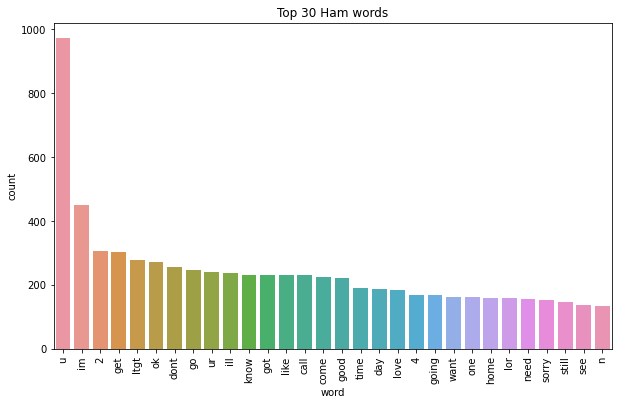

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=ham_top_30_words, ax=ax)
plt.title("Top 30 Ham words")
plt.xticks(rotation='vertical');

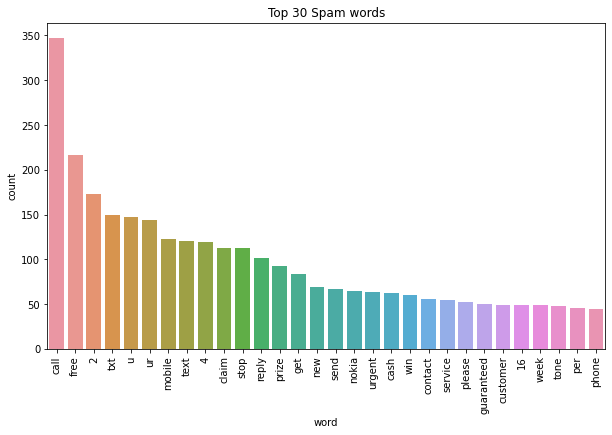

In [24]:

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=spam_top_30_words, ax=ax)
plt.title("Top 30 Spam words")
plt.xticks(rotation='vertical');

# BOW with CountVectorizer

In this scheme, features and samples are defined as follows: each individual token occurrence frequency (normalized or not) is treated as a feature.
the vector of all the token frequencies for a given document is considered a multivariate sample.<br>
A corpus of documents can thus be represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus.
We call vectorization the general process of turning a collection of text documents into numerical feature vectors.<br>
This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation.
Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

<img src="https://github.com/purvasingh96/Talking-points-global-hackathon/blob/master/assets/word2vec_architectures.png?raw=1" width="500"></img>

In this kernel we apply the CountVectorizer from sklearn as BOW model. : [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=punctuation_stopwords_removal).fit(df['text'])

In [26]:
len(bow_transformer.vocabulary_)

9431

In [27]:
sample_spam = df['text'][8]
bow_sample_spam = bow_transformer.transform([sample_spam])
print(sample_spam)
print(bow_sample_spam)

WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
  (0, 218)	1
  (0, 323)	1
  (0, 1906)	1
  (0, 2184)	2
  (0, 2245)	1
  (0, 2531)	1
  (0, 4194)	1
  (0, 4759)	1
  (0, 5707)	1
  (0, 6538)	1
  (0, 6775)	1
  (0, 6946)	1
  (0, 7209)	1
  (0, 8694)	1
  (0, 8698)	1
  (0, 9028)	1
  (0, 9418)	1


In [28]:
print('Printing bag of words for sample 1')
row, cols = bow_sample_spam.nonzero()
for col in cols:
    print(bow_transformer.get_feature_names()[col])

Printing bag of words for sample 1
09061701461
12
call
claim
code
customer
hours
kl341
network
prize
receivea
reward
selected
valid
valued
winner
å£900


In [29]:
import numpy as np
print(np.shape(bow_sample_spam))

(1, 9431)


In [30]:
sample_ham = df['text'][4]
bow_sample_ham = bow_transformer.transform([sample_ham])
print(sample_ham)
print(bow_sample_ham)
rows, cols = bow_sample_ham.nonzero()
print('Printing ')
for col in cols:
    print(bow_transformer.get_feature_names()[col])

Nah I don't think he goes to usf, he lives around here though
  (0, 1279)	1
  (0, 2882)	1
  (0, 3762)	1
  (0, 5004)	1
  (0, 5631)	1
  (0, 8224)	1
  (0, 8243)	1
  (0, 8664)	1
Printing 
around
dont
goes
lives
nah
think
though
usf


# TF-IDF on BOW

TF-IDF expects a bag-of-words (integer values) training corpus during initialization. During transformation, it will take a vector and return another vector of the same dimensionality.<br>

TF-IDF stands for "Term Frequency, Inverse Document Frequency".<br>

* It is a way to score the importance of words (or "terms") in a document based on how frequently they appear across multiple documents.
* If a word appears frequently in a document, it's important. Give the word a high score. But if a word appears in many documents, it's not a unique identifier. Give the word a low score.<br>

* Therefore, common words like *"the"* and *"for"*, which appear in many documents, will be scaled down. Words that appear frequently in a single document will be scaled up.<br>

In other words:
* TF(w) = `(Number of times term w appears in a document) / (Total number of terms in the document).`
* IDF(w) = `log_e(Total number of documents / Number of documents with term w in it).`
For example
Consider a document containing 100 words wherein the word 'tiger' appears 3 times.
* The term frequency (i.e., tf) for 'tiger' is then:<br>
    TF = (3 / 100) = 0.03.
* Now, assume we have 10 million documents and the word 'tiger' appears in 1000 of these. Then, the inverse document frequency (i.e., idf) is calculated as:<br>
`IDF = log(10,000,000 / 1,000) = 4.`
Thus, the Tf-idf weight is the product of these quantities:
TF-IDF = 0.03 * 4 = 0.12.

### TfidfTransformer from sklearn

Both tf and tf–idf can be computed as follows using sklearn's [TfidfTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer

# bag of words in vectorized format
bow_data = bow_transformer.transform(df['text'])
print(bow_data[:1])
tfidf_transformer = TfidfTransformer().fit(bow_data)

  (0, 1142)	1
  (0, 1375)	1
  (0, 1838)	1
  (0, 1840)	1
  (0, 2178)	1
  (0, 2463)	1
  (0, 2988)	1
  (0, 3748)	1
  (0, 3805)	1
  (0, 3845)	1
  (0, 4644)	1
  (0, 4803)	1
  (0, 5624)	1
  (0, 6376)	1
  (0, 8870)	1
  (0, 9107)	1


In [32]:
tfidf_sample_ham = tfidf_transformer.transform(bow_sample_ham)
print('Sample HAM : ')
print(tfidf_sample_ham)

tfidf_sample_spam = tfidf_transformer.transform(bow_sample_spam)
print('Sample SPAM : ')
print(tfidf_sample_spam)

Sample HAM : 
  (0, 8664)	0.4000611457714059
  (0, 8243)	0.35462891367407595
  (0, 8224)	0.2665748147939407
  (0, 5631)	0.40493594386802356
  (0, 5004)	0.44910913790937335
  (0, 3762)	0.35674330934716636
  (0, 2882)	0.23016324066220836
  (0, 1279)	0.31179198007951625
Sample SPAM : 
  (0, 9418)	0.2604683359422661
  (0, 9028)	0.23445094204464131
  (0, 8698)	0.24115248419490207
  (0, 8694)	0.22254833340975305
  (0, 7209)	0.2148462495005997
  (0, 6946)	0.2564029044370425
  (0, 6775)	0.2943229069695555
  (0, 6538)	0.178899142428953
  (0, 5707)	0.2148462495005997
  (0, 4759)	0.2943229069695555
  (0, 4194)	0.22555164191980467
  (0, 2531)	0.1915015107445745
  (0, 2245)	0.21371446699888028
  (0, 2184)	0.3406301232141347
  (0, 1906)	0.1153380143353214
  (0, 323)	0.2387711073538672
  (0, 218)	0.2943229069695555


In [33]:
final_data_tfidf = tfidf_transformer.transform(bow_data)
print(final_data_tfidf)
print(np.shape(final_data_tfidf))

  (0, 9107)	0.22954167967960823
  (0, 8870)	0.18978656059026508
  (0, 6376)	0.26034665364508613
  (0, 5624)	0.1806002024978732
  (0, 4803)	0.28119992157437884
  (0, 4644)	0.3328581634691494
  (0, 3845)	0.18526422487029678
  (0, 3805)	0.15637062087310696
  (0, 3748)	0.15133352947689135
  (0, 2988)	0.19730880900130401
  (0, 2463)	0.2577757346943601
  (0, 2178)	0.28119992157437884
  (0, 1840)	0.28119992157437884
  (0, 1838)	0.31774909628833775
  (0, 1375)	0.2531117123219365
  (0, 1142)	0.3328581634691494
  (1, 9003)	0.4229215011998556
  (1, 8534)	0.19658812296036549
  (1, 5972)	0.5355962344958958
  (1, 5940)	0.2688300250275592
  (1, 4842)	0.4000879300317037
  (1, 4612)	0.5131152435995512
  (2, 9059)	0.18807890505452227
  (2, 9017)	0.14698492929250848
  (2, 8518)	0.12458400696633347
  :	:
  (5568, 3767)	0.3115647413021785
  (5568, 3526)	0.48226234372873406
  (5568, 3151)	0.5533333135181996
  (5568, 1406)	0.3784412255140446
  (5569, 7919)	0.520467167163554
  (5569, 7544)	0.520467167163554
 

### Train test split


In [34]:
from sklearn.model_selection import train_test_split

data_tfidf_train, data_tfidf_test, label_train, label_test = train_test_split(final_data_tfidf, df["spam"], test_size=0.3, random_state=5)

### Results Visualization Methods


In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    #fig, ax = plt.subplots(figsize=(4,4))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  
                cmap="Blues", square=True, cbar=False)
    #  
    plt.ylabel('true label')
    plt.xlabel('predicted label')

### Naive Bayes Classifier for Spam/Ham Classification 

Here we will be using Naive Bayes' [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) to classify emails into spam/ham category. <br>One important thing to note in this part of coding section is that numpy didnt manage to figure out that datatype of `label_train` was float64 and by default it set the datatypt to a generic object.<br>
In order to solve this issue, we need to explicitly define dataype of `label_train` as `np.asarray(label_train, dtype="float64")`.

#### Results

Upon applying NaiveBayes Classifier, we have achieved 96.5% accuracy.<br>
Upon analysis of ROC charecterstics, we have achieved 97.698 as area under the curve (auc)

In [36]:
data_tfidf_train = data_tfidf_train.A
data_tfidf_test = data_tfidf_test.A

In [37]:
print(data_tfidf_train.dtype)
print(label_train.dtype)

float64
object


In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

spam_detect_model_MNB = MultinomialNB()
spam_detect_model_MNB.fit(data_tfidf_train, np.asarray(label_train, dtype="float64"))
pred_test_MNB = spam_detect_model_MNB.predict(data_tfidf_test)
acc_MNB = accuracy_score(np.asarray(label_test, dtype="float64"), pred_test_MNB)
print(acc_MNB)

0.965311004784689


#### ROC Curve

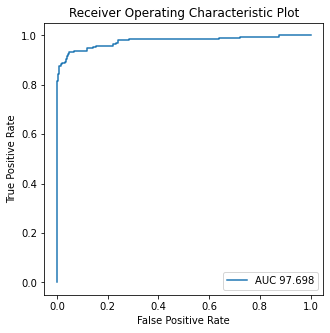

In [39]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thr = roc_curve(np.asarray(label_test, dtype="float64"), spam_detect_model_MNB.predict_proba(data_tfidf_test)[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot')
auc_knn4 = auc(fpr, tpr) * 100
plt.legend(["AUC {0:.3f}".format(auc_knn4)]);

#### Confusion Matrix


In [40]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    #fig, ax = plt.subplots(figsize=(4,4))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  
                cmap="Blues", square=True, cbar=False)
    #  
    plt.ylabel('true label')
    plt.xlabel('predicted label')

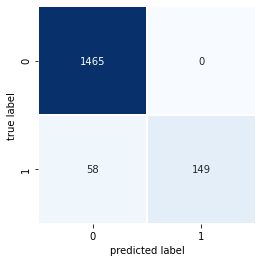

In [41]:
plot_confusion_matrix(np.asarray(label_test, dtype="float64"), pred_test_MNB)